In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

#Data 


In [2]:
import pandas as pd
import matplotlib.pyplot as pltm
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ShubhamAgr09/Training-Datasets/main/car_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [5]:
df.duplicated().value_counts()

False    804
dtype: int64

As there are no null values, duplicates and data-types are correct for each column, we can go forth for EDA.

#TASK-1


##EDA

###Univariate Analysis

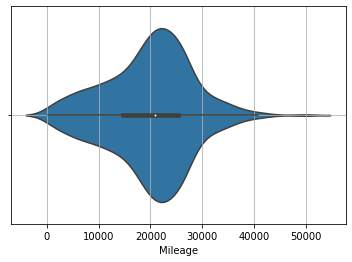

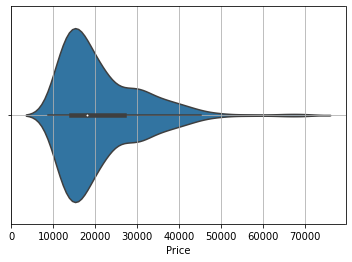

In [6]:
sns.violinplot(x='Mileage',data=df)
plt.grid()
plt.show()

sns.violinplot(x='Price',data=df)
plt.grid()
plt.show()

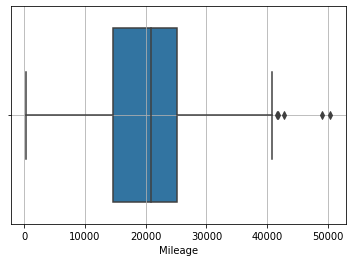

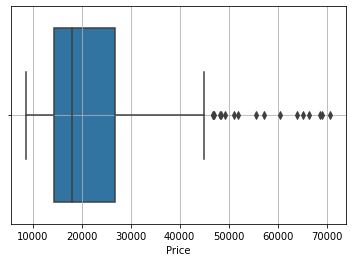

In [7]:
sns.boxplot(x='Mileage',data=df)
plt.grid()
plt.show()
sns.boxplot(x='Price',data=df)
plt.grid()
plt.show()

In [8]:
# df.drop(df[df['Mileage'] > 45000].index, inplace = True)
# df.drop(df[df['Price'] > 45000].index, inplace = True)

###Bivariate Analysis


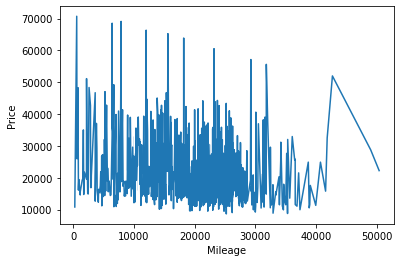

In [9]:
sns.lineplot(x=df.Mileage,y=df.Price)

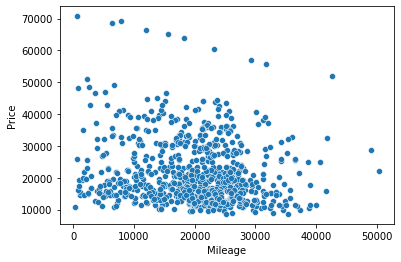

In [10]:
sns.scatterplot(x='Mileage',y='Price',data=df)

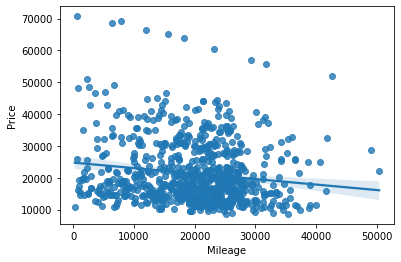

In [11]:
sns.regplot(x='Mileage',y='Price',data=df)

###Correlation

For strong correlation, the correlation value must be  >=.2 or <.2

In [12]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


Conclusion-  
As we can observe that Mileage and Price are not linearly correlated and hence, Mileage can not be used to predict the Price of the car.  
Still for sole understanding and practive purpose, Regression Model is built for predicting Price of car taking Mileage as a feature.

##Model

In [13]:
X = df['Mileage'].values.reshape(-1,1)
y = df['Price'].values

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=20)
# print(cross_val_score(LinearRegression(),X,y,cv=3,n_jobs=-1))

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

###Equation of Line

In [16]:
print('Equation of Regression Line: y = {0}x + {1}'.format(model.coef_,model.intercept_))

Equation of Regression Line: y = [-0.12719071]x + 23761.523191089404


##Evaluation Metric

In [17]:
from sklearn.metrics import r2_score
# print(model.score(X_test,y_test))
score = r2_score(y_test,y_pred)
print("Accuracy: ", score*100, '%')

Accuracy:  4.475444034453801 %


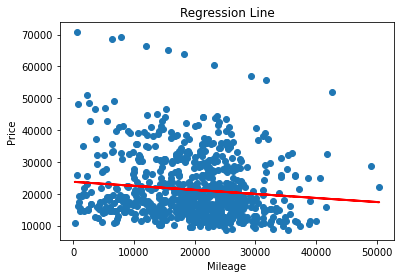

In [18]:
plt.scatter(X,y)
Y = model.coef_*X + model.intercept_
plt.plot(X,Y,'r',lw=2)
plt.title("Regression Line")
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

Conclusion for TASK-1:  
As we estimated Mileage and Price are not correlated. Hence, the Linear Regression Model is built with very low accuracy.

#Task-2

##EDA


In [19]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

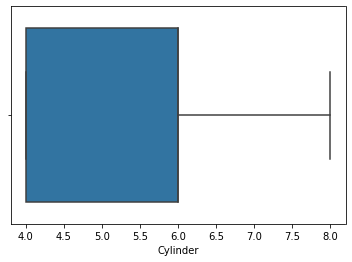

In [20]:
sns.boxplot(x=df['Cylinder'],data=df)

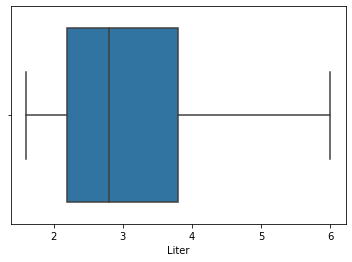

In [21]:
sns.boxplot(x=df['Liter'],data=df)

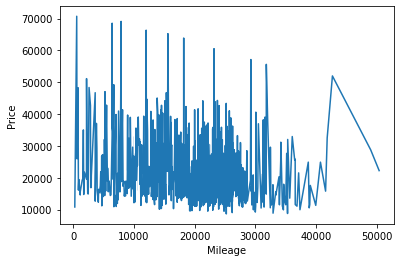

In [22]:
sns.lineplot(x=df.Mileage,y=df.Price)

##Model

In [51]:
df2=df[['Price','Mileage', 'Cylinder','Liter', 'Doors', 'Cruise', 'Sound','Leather']].copy()

In [52]:
X = df2[['Mileage', 'Cylinder','Liter', 'Doors', 'Cruise', 'Sound','Leather']].values
y = df2['Price'].values

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=32)

In [54]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
print('y = {0}x + {1}'.format(model.coef_,model.intercept_))

y = [-1.54461557e-01  3.67778974e+03 -7.12100317e+02 -1.64906998e+03
  6.28464132e+03 -2.04987991e+03  3.38083769e+03]x + 7193.560680102468


In [56]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)
print("Accuracy: ", score*100, '%')

Accuracy:  29.398170152265045 %


#TASK-3

In [29]:
df1 = pd.DataFrame()
df1 = pd.get_dummies(df[['Make']],prefix='Dummy')
df1['Price'] = df.Price.copy()

In [30]:
df1.columns

Index(['Dummy_Buick', 'Dummy_Cadillac', 'Dummy_Chevrolet', 'Dummy_Pontiac',
       'Dummy_SAAB', 'Dummy_Saturn', 'Price'],
      dtype='object')

In [31]:
df1[['Dummy_Buick','Price']].corr()

,Dummy_Buick,Price
Dummy_Buick,1.000000,-0.017768
Price,-0.017768,1.000000


In [32]:
df1[['Dummy_Cadillac','Price']].corr()

,Dummy_Cadillac,Price
Dummy_Cadillac,1.000000,0.659297
Price,0.659297,1.000000


In [33]:
df1[['Dummy_Chevrolet','Price']].corr()

,Dummy_Chevrolet,Price
Dummy_Chevrolet,1.000000,-0.404598
Price,-0.404598,1.000000


In [34]:
df1[['Dummy_Pontiac','Price']].corr()

,Dummy_Pontiac,Price
Dummy_Pontiac,1.000000,-0.142095
Price,-0.142095,1.000000


In [35]:
df1[['Dummy_SAAB','Price']].corr()

,Dummy_SAAB,Price
Dummy_SAAB,1.000000,0.335404
Price,0.335404,1.000000


In [36]:
df1[['Dummy_Saturn','Price']].corr()

,Dummy_Saturn,Price
Dummy_Saturn,1.000000,-0.211701
Price,-0.211701,1.000000


Hence, we can drop Dummy_Pontiac and Dummy_Buick

In [37]:
X = df1[['Dummy_Cadillac', 'Dummy_Chevrolet','Dummy_SAAB', 'Dummy_Saturn']].values
y = df1['Price'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=8)
model=LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test,y_pred)
print("Accuracy:", score*100, '%')

Accuracy: 73.40569586053934 %


In [38]:
df2 = pd.DataFrame()
df2 = pd.get_dummies(df[['Model']],prefix='Dummy')
df2['Price'] = df.Price.copy()

In [39]:
df2.columns

Index(['Dummy_9-2X AWD', 'Dummy_9_3', 'Dummy_9_3 HO', 'Dummy_9_5',
       'Dummy_9_5 HO', 'Dummy_AVEO', 'Dummy_Bonneville', 'Dummy_CST-V',
       'Dummy_CTS', 'Dummy_Cavalier', 'Dummy_Century', 'Dummy_Classic',
       'Dummy_Cobalt', 'Dummy_Corvette', 'Dummy_Deville', 'Dummy_G6',
       'Dummy_GTO', 'Dummy_Grand Am', 'Dummy_Grand Prix', 'Dummy_Impala',
       'Dummy_Ion', 'Dummy_L Series', 'Dummy_Lacrosse', 'Dummy_Lesabre',
       'Dummy_Malibu', 'Dummy_Monte Carlo', 'Dummy_Park Avenue',
       'Dummy_STS-V6', 'Dummy_STS-V8', 'Dummy_Sunfire', 'Dummy_Vibe',
       'Dummy_XLR-V8', 'Price'],
      dtype='object')

In [40]:
X = df2[['Dummy_9-2X AWD', 'Dummy_9_3', 'Dummy_9_3 HO', 'Dummy_9_5',\
       'Dummy_9_5 HO', 'Dummy_AVEO', 'Dummy_Bonneville', 'Dummy_CST-V',\
       'Dummy_CTS', 'Dummy_Cavalier', 'Dummy_Century', 'Dummy_Classic',\
       'Dummy_Cobalt', 'Dummy_Corvette', 'Dummy_Deville', 'Dummy_G6',\
       'Dummy_GTO', 'Dummy_Grand Am', 'Dummy_Grand Prix', 'Dummy_Impala',\
       'Dummy_Ion', 'Dummy_L Series', 'Dummy_Lacrosse', 'Dummy_Lesabre',\
       'Dummy_Malibu', 'Dummy_Monte Carlo', 'Dummy_Park Avenue',\
       'Dummy_STS-V6', 'Dummy_STS-V8', 'Dummy_Sunfire', 'Dummy_Vibe']].values
y = df2['Price'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=8)
model=LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test,y_pred)
print("Accuracy:", score*100, '%')

Accuracy: 93.0547751476111 %


In [49]:
df3 = pd.DataFrame()
df3 = pd.get_dummies(df[['Type']],prefix='Dummy')
df3['Price'] = df.Price.copy()

In [50]:
X = df3[['Dummy_Convertible', 'Dummy_Coupe', 'Dummy_Hatchback', 'Dummy_Sedan',\
       'Dummy_Wagon']].values
y = df3['Price'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=8)
model=LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test,y_pred)
print("Accuracy:", score*100, '%')

Accuracy: 29.398170152265045 %


Hence, we can deduce that dummy variables for Model can be used for prediction but dummy variables for make and body type don't give good prediction.